In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Tahap 0: Menginstal library yang diperlukan (SHAP, LIME)...
✓ Instalasi selesai.

Tahap 1: Mengimpor library dan melakukan pengaturan global...
  - TensorFlow Version: 2.18.0
  - SHAP Version: 0.44.1
  - GPU Available: Yes
  - Mixed Precision Policy: float32
✓ Pengaturan global selesai.

Tahap 2: Mempersiapkan model U-Net untuk segmentasi paru-paru...
⚠ PERINGATAN: Gagal memuat model segmentasi: Layer count mismatch when loading weights from file. Model expected 13 layers, found 23 saved layers.
  Harap pastikan path file benar dan arsitektur model cocok.
  Metrik XAI kuantitatif akan dilewati.
  Visualisasi XAI akan berjalan, tetapi masker paru-paru akan kosong.

Tahap 3: Mengonfigurasi parameter dan menyiapkan pipeline data...
✓ Dataset ditemukan!
  - Parameter diatur: Epochs=15, Batch Size=32

--- Distribusi Dataset ---
       NORMAL  PNEUMONIA  Total
train    1341       3875   5216
val         8          8     16
test      234        390    624

✓ Bobot kelas dihitung untuk mengata

Model: "ResNet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                               ┃ Output Shape                    ┃           Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_ResNet50 (InputLayer)                │ (None, 224, 224, 3)             │                 0 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ resnet50 (Functional)                      │ (None, 7, 7, 2048)              │        23,587,712 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ global_avg_pool (GlobalAveragePooling2D)   │ (None, 2048)                    │                 0 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ dropout_top (Dropout)                      │ (None, 2048)                    │                 0 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ dense_top (Dense)                          │ (None, 256)                     │           524,544 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ output_classifier (Dense)                  │ (None, 1)                       │               257 │
└────────────────────────────────────────────┴─────────────────────────────────┴───────────────────┘

 Total params: 24,112,513 (91.98 MB)

 Trainable params: 14,974,977 (57.13 MB)

 Non-trainable params: 9,137,536 (34.86 MB)

Epoch 1/15


I0000 00:00:1760444216.851414     106 service.cc:148] XLA service 0x7974508185d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1760444216.854889     106 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1760444216.854912     106 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1760444219.022638     106 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/163 ━━━━━━━━━━━━━━━━━━━━ 1:18:10 29s/step - accuracy: 0.4688 - auc: 0.6068 - loss: 0.7159 - precision: 0.8182 - recall: 0.3750

I0000 00:00:1760444227.933433     106 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 849ms/step - accuracy: 0.9108 - auc: 0.9689 - loss: 0.2007 - precision: 0.9732 - recall: 0.9045
Epoch 1: val_accuracy improved from -inf to 0.93750, saving model to ./saved_models/ResNet50_best_weights.weights.h5
163/163 ━━━━━━━━━━━━━━━━━━━━ 175s 903ms/step - accuracy: 0.9110 - auc: 0.9691 - loss: 0.2003 - precision: 0.9733 - recall: 0.9047 - val_accuracy: 0.9375 - val_auc: 1.0000 - val_loss: 0.1338 - val_precision: 0.8889 - val_recall: 1.0000 - learning_rate: 1.0000e-04
Epoch 2/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 615ms/step - accuracy: 0.9777 - auc: 0.9973 - loss: 0.0587 - precision: 0.9950 - recall: 0.9753
Epoch 2: val_accuracy improved from 0.93750 to 1.00000, saving model to ./saved_models/ResNet50_best_weights.weights.h5
163/163 ━━━━━━━━━━━━━━━━━━━━ 102s 622ms/step - accuracy: 0.9777 - auc: 0.9973 - loss: 0.0587 - precision: 0.9950 - recall: 0.9753 - val_accuracy: 1.0000 - val_auc: 1.0000 - val_loss: 0.0139 - val_precision: 1.0000 - val_recall: 1.000

Model: "DenseNet121"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                               ┃ Output Shape                    ┃           Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_DenseNet121 (InputLayer)             │ (None, 224, 224, 3)             │                 0 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ densenet121 (Functional)                   │ (None, 7, 7, 1024)              │         7,037,504 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ global_avg_pool (GlobalAveragePooling2D)   │ (None, 1024)                    │                 0 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ dropout_top (Dropout)                      │ (None, 1024)                    │                 0 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ dense_top (Dense)                          │ (None, 256)                     │           262,400 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ output_classifier (Dense)                  │ (None, 1)                       │               257 │
└────────────────────────────────────────────┴─────────────────────────────────┴───────────────────┘

 Total params: 7,300,161 (27.85 MB)

 Trainable params: 904,065 (3.45 MB)

 Non-trainable params: 6,396,096 (24.40 MB)

Epoch 1/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 577ms/step - accuracy: 0.7117 - auc: 0.7835 - loss: 0.5485 - precision: 0.8763 - recall: 0.7091
Epoch 1: val_accuracy improved from -inf to 0.75000, saving model to ./saved_models/DenseNet121_best_weights.weights.h5
163/163 ━━━━━━━━━━━━━━━━━━━━ 153s 681ms/step - accuracy: 0.7123 - auc: 0.7842 - loss: 0.5477 - precision: 0.8766 - recall: 0.7096 - val_accuracy: 0.7500 - val_auc: 0.9688 - val_loss: 0.4096 - val_precision: 0.6667 - val_recall: 1.0000 - learning_rate: 1.0000e-04
Epoch 2/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 572ms/step - accuracy: 0.9002 - auc: 0.9643 - loss: 0.2350 - precision: 0.9735 - recall: 0.8909
Epoch 2: val_accuracy improved from 0.75000 to 0.93750, saving model to ./saved_models/DenseNet121_best_weights.weights.h5
163/163 ━━━━━━━━━━━━━━━━━━━━ 95s 580ms/step - accuracy: 0.9002 - auc: 0.9643 - loss: 0.2349 - precision: 0.9735 - recall: 0.8909 - val_accuracy: 0.9375 - val_auc: 1.0000 - val_loss: 0.1993 - val_precision: 0.8889 - v

Model: "InceptionV3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                               ┃ Output Shape                    ┃           Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_InceptionV3 (InputLayer)             │ (None, 299, 299, 3)             │                 0 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ inception_v3 (Functional)                  │ (None, 8, 8, 2048)              │        21,802,784 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ global_avg_pool (GlobalAveragePooling2D)   │ (None, 2048)                    │                 0 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ dropout_top (Dropout)                      │ (None, 2048)                    │                 0 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ dense_top (Dense)                          │ (None, 256)                     │           524,544 │
├────────────────────────────────────────────┼─────────────────────────────────┼───────────────────┤
│ output_classifier (Dense)                  │ (None, 1)                       │               257 │
└────────────────────────────────────────────┴─────────────────────────────────┴───────────────────┘

 Total params: 22,327,585 (85.17 MB)

 Trainable params: 5,680,833 (21.67 MB)

 Non-trainable params: 16,646,752 (63.50 MB)

Epoch 1/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 859ms/step - accuracy: 0.8555 - auc: 0.9368 - loss: 0.2964 - precision: 0.9597 - recall: 0.8376
Epoch 1: val_accuracy improved from -inf to 0.93750, saving model to ./saved_models/InceptionV3_best_weights.weights.h5
163/163 ━━━━━━━━━━━━━━━━━━━━ 182s 935ms/step - accuracy: 0.8558 - auc: 0.9371 - loss: 0.2958 - precision: 0.9598 - recall: 0.8381 - val_accuracy: 0.9375 - val_auc: 0.9688 - val_loss: 0.2216 - val_precision: 0.8889 - val_recall: 1.0000 - learning_rate: 1.0000e-04
Epoch 2/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 871ms/step - accuracy: 0.9547 - auc: 0.9903 - loss: 0.1210 - precision: 0.9839 - recall: 0.9545
Epoch 2: val_accuracy did not improve from 0.93750
163/163 ━━━━━━━━━━━━━━━━━━━━ 143s 873ms/step - accuracy: 0.9547 - auc: 0.9903 - loss: 0.1209 - precision: 0.9839 - recall: 0.9545 - val_accuracy: 0.9375 - val_auc: 0.9844 - val_loss: 0.1812 - val_precision: 0.8889 - val_recall: 1.0000 - learning_rate: 1.0000e-04
Epoch 3/15
163/163 ━━━━━━

Prediksi Ensemble:   0%|          | 0/624 [00:00<?, ?it/s]

✓ Akurasi Ensemble pada Data Tes: 0.8446 (84.46%)

Membuat plot riwayat pelatihan...


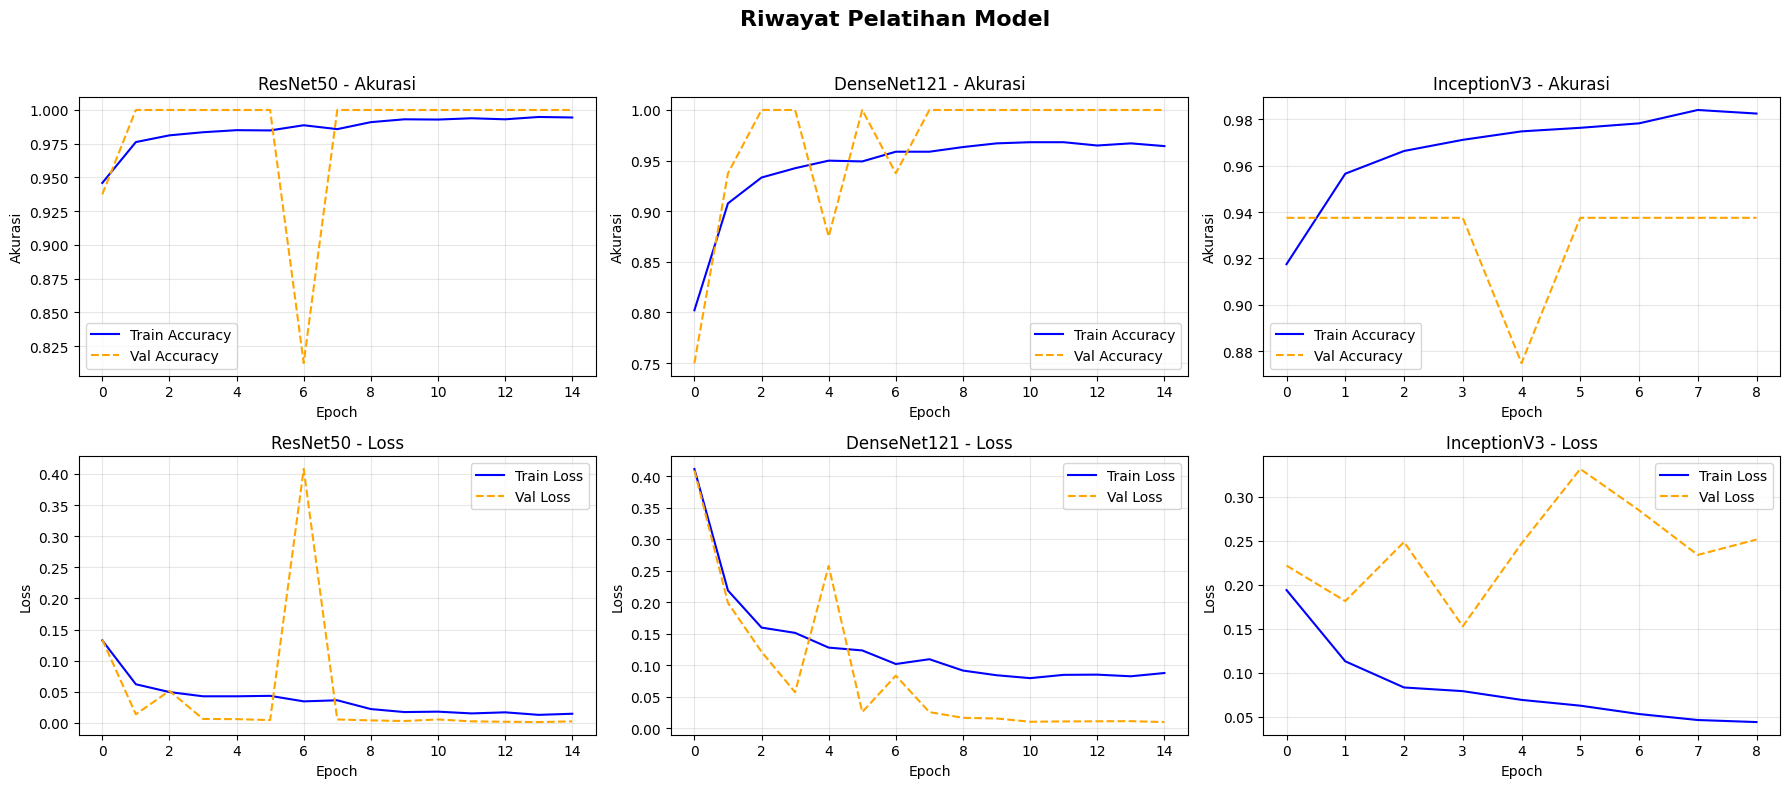


HASIL PADA DATA TES (ENSEMBLE)


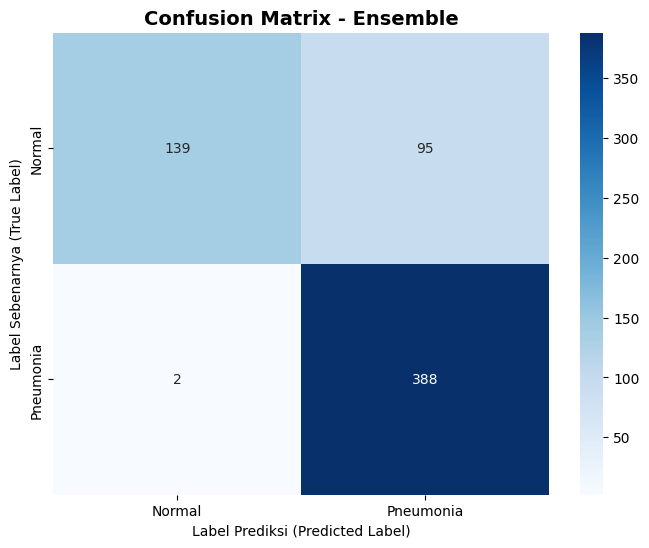


--- Laporan Klasifikasi (Classification Report) ---
                     precision    recall  f1-score   support

   Normal (Class 0)     0.9858    0.5940    0.7413       234
Pneumonia (Class 1)     0.8033    0.9949    0.8889       390

           accuracy                         0.8446       624
          macro avg     0.8946    0.7944    0.8151       624
       weighted avg     0.8718    0.8446    0.8336       624


--- Kurva Receiver Operating Characteristic (ROC) ---


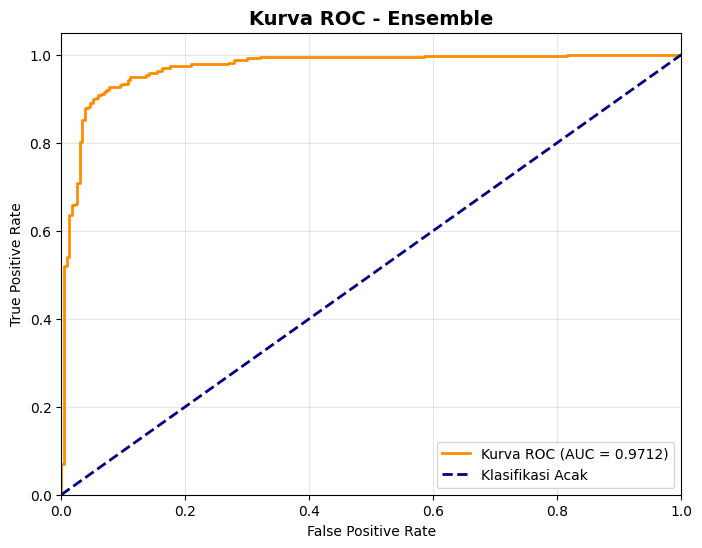


✓ Evaluasi dan visualisasi performa selesai.

Akhir dari Bagian 3/4. Silakan berikan perintah 'lanjutkan'.
Memulai Bagian 4: Analisis Explainable AI (XAI)...

Tahap 8: Mendefinisikan fungsi untuk analisis Grad-CAM dan metrik kuantitatif...
✓ Fungsi untuk analisis XAI telah didefinisikan.

Tahap 9: Menjalankan pipeline analisis XAI pada sampel data tes...

--- Menganalisis gambar: person1676_virus_2892.jpeg ---
  - Memproses model: ResNet50
  ⚠ Gagal menemukan layer konvolusi untuk ResNet50: Tidak ditemukan layer konvolusi dalam model.
  - Memproses model: DenseNet121


KeyError: 'densenet121'

In [3]:
# ============================================================================
# BAGIAN 1/4: PENGATURAN, KONFIGURASI, DAN PERSIAPAN DATA
# ============================================================================

# ----------------------------------------------------------------------------
# Langkah 0: Instalasi Library Tambahan
# ----------------------------------------------------------------------------
print("Tahap 0: Menginstal library yang diperlukan (SHAP, LIME)...")
# Menggunakan --quiet untuk output yang lebih bersih
!pip install shap lime --quiet
print("✓ Instalasi selesai.")


# ----------------------------------------------------------------------------
# Langkah 1: Impor Library & Pengaturan Global
# ----------------------------------------------------------------------------
print("\nTahap 1: Mengimpor library dan melakukan pengaturan global...")

import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from glob import glob
import warnings
from tqdm.notebook import tqdm

# Mengatur agar peringatan tidak mengganggu output
warnings.filterwarnings('ignore')

# Impor library XAI (Explainable AI)
import shap
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries

# Impor library TensorFlow & Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.applications import (
    ResNet50, DenseNet121, InceptionV3,
    resnet50, densenet, inception_v3
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras import mixed_precision

# Impor library Scikit-learn
from sklearn.metrics import (classification_report, confusion_matrix, 
                             roc_curve, auc)

# Mengatur kebijakan presisi ke float32. Ini penting untuk stabilitas
# library XAI seperti Grad-CAM dan SHAP, terutama saat menggunakan GPU.
policy = mixed_precision.Policy('float32')
mixed_precision.set_global_policy(policy)

# Mengatur seed untuk CPU (numpy) dan GPU (tensorflow) agar hasil
# eksperimen dapat direproduksi (reproducible).
np.random.seed(42)
tf.random.set_seed(42)

# Mencetak informasi versi dan konfigurasi untuk verifikasi
print(f"  - TensorFlow Version: {tf.__version__}")
print(f"  - SHAP Version: {shap.__version__}")
print(f"  - GPU Available: {'Yes' if tf.config.list_physical_devices('GPU') else 'No'}")
print(f"  - Mixed Precision Policy: {mixed_precision.global_policy().name}")
print("✓ Pengaturan global selesai.")


# ----------------------------------------------------------------------------
# Langkah 2: Pengaturan Model Segmentasi Paru-Paru (Alat Bantu untuk Evaluasi XAI)
# ----------------------------------------------------------------------------
print("\nTahap 2: Mempersiapkan model U-Net untuk segmentasi paru-paru...")

# Definisikan arsitektur U-Net sederhana. Model ini akan digunakan sebagai
# "kunci jawaban" untuk mengetahui di mana letak paru-paru pada gambar.
# CATATAN: Arsitektur ini harus SAMA dengan yang digunakan untuk melatih model yang akan dimuat.
def build_unet(input_shape=(256, 256, 1)):
    inputs = tf.keras.layers.Input(input_shape)
    # Encoder Path
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
    c1 = tf.keras.layers.Dropout(0.1)(c1)
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = tf.keras.layers.Dropout(0.1)(c2)
    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

    # Bottleneck
    c5 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c5 = tf.keras.layers.Dropout(0.2)(c5)
    c5 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

    # Decoder Path (Expansive Path)
    u6 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = tf.keras.layers.concatenate([u6, c2])
    c6 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = tf.keras.layers.Dropout(0.1)(c6)
    c6 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

    u7 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = tf.keras.layers.concatenate([u7, c1])
    c7 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = tf.keras.layers.Dropout(0.1)(c7)
    c7 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

    outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c7)

    return tf.keras.Model(inputs=[inputs], outputs=[outputs], name="UNet_Lung_Segmentor")

# Path ke file bobot model U-Net yang sudah dilatih.
# SESUAIKAN 'nama-folder-hasil-upload' DENGAN NAMA FOLDER YANG BENAR SETELAH ANDA UPLOAD FILE .HDF5
# Contoh: Jika Anda upload file 'Lung_Segmentation.hdf5', folder bisa jadi 'lung-segmentation-hdf5'
# dan pathnya menjadi seperti di bawah ini. Cek nama folder di panel input Anda di Kaggle.
unet_path = '/kaggle/input/u-net-lung/keras/default/1/cxr_reg_weights.best.hdf5' # <--- GANTI 'lung-segmentation-hdf5' DAN 'Lung_Segmentation.hdf5' SESUAI UPLOAD ANDA
segmentation_model = None
try:
    segmentation_model = build_unet()
    segmentation_model.load_weights(unet_path)
    # Membuat 'warm-up' call untuk menginisialisasi model di GPU
    _ = segmentation_model.predict(np.zeros((1, 256, 256, 1)), verbose=0)
    print("✓ Model segmentasi U-Net berhasil dimuat dan siap digunakan.")
except FileNotFoundError:
    print(f"⚠ PERINGATAN: File bobot U-Net '{unet_path}' tidak ditemukan.")
    print("  Harap pastikan Anda telah meng-upload file .hdf5 ke notebook Anda dan path di atas benar.")
    print("  Metrik XAI kuantitatif (IoU, Localization Accuracy) akan dilewati.")
    print("  Visualisasi XAI akan berjalan, tetapi masker paru-paru akan kosong.")
except Exception as e:
    print(f"⚠ PERINGATAN: Gagal memuat model segmentasi: {e}")
    print("  Harap pastikan path file benar dan arsitektur model cocok.")
    print("  Metrik XAI kuantitatif akan dilewati.")
    print("  Visualisasi XAI akan berjalan, tetapi masker paru-paru akan kosong.")


# ----------------------------------------------------------------------------
# Langkah 3: Konfigurasi, Path, dan Persiapan Data
# ----------------------------------------------------------------------------
print("\nTahap 3: Mengonfigurasi parameter dan menyiapkan pipeline data...")

# ---- Path Detection ----
def find_dataset_paths():
    """Fungsi untuk mendeteksi path dataset secara otomatis di lingkungan Kaggle."""
    possible_bases = ["/kaggle/input/pneumonia", "/kaggle/input/chest-xray-pneumonia", "/kaggle/input/chest-xray-pneumonia/chest_xray", "/kaggle/input"]
    for base in possible_bases:
        if not os.path.exists(base): continue
        structures = [
            {'train': os.path.join(base, 'Pneumonia/train'), 'val': os.path.join(base, 'Pneumonia/val'), 'test': os.path.join(base, 'Pneumonia/test')},
            {'train': os.path.join(base, 'chest_xray/train'), 'val': os.path.join(base, 'chest_xray/val'), 'test': os.path.join(base, 'chest_xray/test')},
            {'train': os.path.join(base, 'train'), 'val': os.path.join(base, 'val'), 'test': os.path.join(base, 'test')}
        ]
        for struct in structures:
            if all(os.path.exists(p) for p in struct.values()):
                # Verifikasi cepat bahwa direktori tidak kosong
                if len(glob(os.path.join(struct['train'], '*/*'))) > 0:
                    print("✓ Dataset ditemukan!")
                    return base, struct['train'], struct['val'], struct['test']
    raise FileNotFoundError("Dataset pneumonia tidak ditemukan! Harap periksa 'Add data'.")

base_dir, train_dir, val_dir, test_dir = find_dataset_paths()

# ---- Konfigurasi Eksperimen ----
class Config:
    """Kelas untuk menyimpan semua hyperparameter dan konfigurasi secara terpusat."""
    TRAIN_DIR = train_dir
    VAL_DIR = val_dir
    TEST_DIR = test_dir

    # Ukuran input yang berbeda untuk model yang berbeda
    IMG_SIZE_224 = (224, 224)  # Untuk ResNet50, DenseNet121
    IMG_SIZE_299 = (299, 299)  # WAJIB untuk InceptionV3

    BATCH_SIZE = 32
    EPOCHS = 15  # Sesuai permintaan Anda, dinaikkan untuk performa yang lebih baik
    LEARNING_RATE = 1e-4

    # Parameter untuk augmentasi data yang realistis secara medis
    ROTATION_RANGE, WIDTH_SHIFT, HEIGHT_SHIFT, ZOOM_RANGE, SHEAR_RANGE = 12, 0.1, 0.1, 0.1, 0.1

    MODEL_DIR = "./saved_models"

config = Config()
os.makedirs(config.MODEL_DIR, exist_ok=True)
print(f"  - Parameter diatur: Epochs={config.EPOCHS}, Batch Size={config.BATCH_SIZE}")

# ---- Analisis Distribusi Data & Perhitungan Class Weight ----
def explore_dataset(train_dir, val_dir, test_dir):
    """Menganalisis dan mencetak distribusi kelas (Normal vs. Pneumonia)."""
    stats = {}
    for split_name, split_path in [('train', train_dir), ('val', val_dir), ('test', test_dir)]:
        try:
            normal_count = len(glob(os.path.join(split_path, "NORMAL/*")))
            pneumonia_count = len(glob(os.path.join(split_path, "PNEUMONIA/*")))
            stats[split_name] = {'NORMAL': normal_count, 'PNEUMONIA': pneumonia_count, 'Total': normal_count + pneumonia_count}
        except FileNotFoundError:
            stats[split_name] = {'NORMAL': 0, 'PNEUMONIA': 0, 'Total': 0}
    df = pd.DataFrame(stats).T.fillna(0).astype(int)
    print("\n--- Distribusi Dataset ---")
    print(df)
    return stats

dataset_stats = explore_dataset(config.TRAIN_DIR, config.VAL_DIR, config.TEST_DIR)

# Menghitung bobot kelas untuk menangani data yang tidak seimbang
total_train = dataset_stats['train']['Total']
normal_train = dataset_stats['train']['NORMAL']
pneumonia_train = dataset_stats['train']['PNEUMONIA']
if total_train > 0 and normal_train > 0 and pneumonia_train > 0:
    weight_for_0 = total_train / (2 * normal_train)
    weight_for_1 = total_train / (2 * pneumonia_train)
    config.CLASS_WEIGHTS = {0: weight_for_0, 1: weight_for_1}
    print(f"\n✓ Bobot kelas dihitung untuk mengatasi ketidakseimbangan: {config.CLASS_WEIGHTS}")
else:
    config.CLASS_WEIGHTS = {0: 1.0, 1: 1.0}
    print("\n⚠ Peringatan: Tidak dapat menghitung bobot kelas, menggunakan bobot default (1:1).")

# ---- Pembuatan Generator Data ----
def create_generators():
    """Membuat generator data Keras dengan augmentasi dan preprocessing yang benar."""
    print("\nMembuat generator data...")

    # --- Set Generator untuk ukuran 224x224 (ResNet50, DenseNet121) ---
    train_datagen_224 = ImageDataGenerator(
        preprocessing_function=resnet50.preprocess_input, # Menggunakan preprocessing bawaan
        rotation_range=config.ROTATION_RANGE,
        width_shift_range=config.WIDTH_SHIFT,
        height_shift_range=config.HEIGHT_SHIFT,
        zoom_range=config.ZOOM_RANGE,
        shear_range=config.SHEAR_RANGE,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    val_test_datagen_224 = ImageDataGenerator(preprocessing_function=resnet50.preprocess_input)

    train_gen_224 = train_datagen_224.flow_from_directory(config.TRAIN_DIR, target_size=config.IMG_SIZE_224, batch_size=config.BATCH_SIZE, class_mode='binary', shuffle=True, seed=42)
    val_gen_224 = val_test_datagen_224.flow_from_directory(config.VAL_DIR, target_size=config.IMG_SIZE_224, batch_size=config.BATCH_SIZE, class_mode='binary', shuffle=False)
    test_gen_224 = val_test_datagen_224.flow_from_directory(config.TEST_DIR, target_size=config.IMG_SIZE_224, batch_size=config.BATCH_SIZE, class_mode='binary', shuffle=False)
    print("✓ Generator 224x224 (untuk ResNet50, DenseNet121) berhasil dibuat.")

    # --- Set Generator untuk ukuran 299x299 (InceptionV3) ---
    train_datagen_299 = ImageDataGenerator(
        preprocessing_function=inception_v3.preprocess_input, # Menggunakan preprocessing bawaan
        rotation_range=config.ROTATION_RANGE,
        width_shift_range=config.WIDTH_SHIFT,
        height_shift_range=config.HEIGHT_SHIFT,
        zoom_range=config.ZOOM_RANGE,
        shear_range=config.SHEAR_RANGE,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    val_test_datagen_299 = ImageDataGenerator(preprocessing_function=inception_v3.preprocess_input)

    train_gen_299 = train_datagen_299.flow_from_directory(config.TRAIN_DIR, target_size=config.IMG_SIZE_299, batch_size=config.BATCH_SIZE, class_mode='binary', shuffle=True, seed=42)
    val_gen_299 = val_test_datagen_299.flow_from_directory(config.VAL_DIR, target_size=config.IMG_SIZE_299, batch_size=config.BATCH_SIZE, class_mode='binary', shuffle=False)
    test_gen_299 = val_test_datagen_299.flow_from_directory(config.TEST_DIR, target_size=config.IMG_SIZE_299, batch_size=config.BATCH_SIZE, class_mode='binary', shuffle=False)
    print("✓ Generator 299x299 (untuk InceptionV3) berhasil dibuat.")

    # Mencetak jumlah sampel yang ditemukan
    print(f"  - Total sampel training: {train_gen_224.samples}")
    print(f"  - Total sampel validasi: {val_gen_224.samples} (Catatan: set validasi ini kecil, pertimbangkan K-Fold CV untuk riset lanjutan)")
    print(f"  - Total sampel tes: {test_gen_224.samples}")

    return (train_gen_224, val_gen_224, test_gen_224), (train_gen_299, val_gen_299, test_gen_299)

(train_gen_224, val_gen_224, test_gen_224), (train_gen_299, val_gen_299, test_gen_299) = create_generators()
print("\n✓ Persiapan data selesai. Siap untuk membangun dan melatih model.")
print("\n" + "="*80)
print("Akhir dari Bagian 1/4. Silakan berikan perintah 'lanjutkan'.")
print("="*80)

# ============================================================================
# BAGIAN 2/4: PEMBANGUNAN DAN PELATIHAN MODEL
# ============================================================================
print("Memulai Bagian 2: Pembangun dan Pelatihan Model...")

# ----------------------------------------------------------------------------
# Langkah 4: Fungsi untuk Membangun dan Melatih Model Individual
# ----------------------------------------------------------------------------
print("\nTahap 4: Mendefinisikan fungsi untuk membangun dan melatih model...")

def build_individual_model(base_model_class, model_name, input_shape):
    """
    Membangun model kustom di atas arsitektur pre-trained (transfer learning).

    Args:
        base_model_class: Kelas dari model dasar (e.g., ResNet50).
        model_name (str): Nama untuk model yang akan dibangun.
        input_shape (tuple): Bentuk input gambar (H, W, C).

    Returns:
        tf.keras.Model: Model Keras yang telah dikompilasi.
    """
    print(f"\n--- Membangun model: {model_name} dengan input {input_shape} ---")

    # 1. Muat model dasar dengan bobot dari ImageNet, tanpa lapisan klasifikasi (include_top=False)
    # Perbaikan: Pastikan input_shape memiliki 3 elemen (tinggi, lebar, channel)
    # Karena kita memproses gambar RGB, channel selalu 3
    input_shape_with_channels = input_shape + (3,) if len(input_shape) == 2 else input_shape
    base_model = base_model_class(
        include_top=False,
        weights='imagenet',
        input_shape=input_shape_with_channels # Gunakan shape yang benar
    )

    # 2. Terapkan strategi fine-tuning: 'unfreeze' beberapa lapisan terakhir
    #    Ini memungkinkan model untuk mempelajari fitur yang lebih spesifik untuk data rontgen.
    #    Kita akan membuat 30 lapisan terakhir dapat dilatih.
    for layer in base_model.layers:
        layer.trainable = False  # Bekukan semua lapisan terlebih dahulu

    if len(base_model.layers) > 30:
        for layer in base_model.layers[-30:]:
            layer.trainable = True # Buka 'gembok' 30 lapisan terakhir

    # 3. Bangun 'kepala' klasifikasi kustom di atas model dasar
    inputs = keras.Input(shape=input_shape_with_channels, name=f'input_{model_name}')
    # Set training=False untuk base_model agar lapisan BatchNormalization
    # menggunakan statistik yang telah dipelajari dari ImageNet. Ini lebih stabil.
    x = base_model(inputs, training=False) 
    x = layers.GlobalAveragePooling2D(name='global_avg_pool')(x)
    x = layers.Dropout(0.5, name='dropout_top')(x) # Dropout yang lebih agresif
    x = layers.Dense(256, activation='relu', name='dense_top')(x)
    # Output akhir dengan aktivasi sigmoid untuk klasifikasi biner
    outputs = layers.Dense(1, activation='sigmoid', name='output_classifier')(x)

    model = models.Model(inputs=inputs, outputs=outputs, name=model_name)

    # Hitung dan cetak jumlah parameter yang dapat dilatih
    trainable_params = sum([tf.size(v).numpy() for v in model.trainable_variables])
    total_params = sum([tf.size(v).numpy() for v in model.variables])
    print(f"✓ Model {model_name} berhasil dibangun.")
    print(f"  - Total Parameter: {total_params:,}")
    print(f"  - Parameter Dapat Dilatih: {trainable_params:,} ({trainable_params/total_params:.2%})")

    return model

def get_training_callbacks(model_name):
    """
    Mengonfigurasi dan mengembalikan serangkaian callback untuk proses pelatihan.
    """
    # 1. EarlyStopping: Menghentikan pelatihan jika tidak ada peningkatan pada val_loss
    #    untuk beberapa epoch (patience) untuk mencegah overfitting.
    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=5,  # Sedikit lebih sabar
        restore_best_weights=True,
        verbose=1
    )

    # 2. ReduceLROnPlateau: Mengurangi learning rate jika loss di data validasi stagnan.
    #    Ini membantu model keluar dari 'plateau' lokal.
    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2, # Kurangi LR sebesar 80%
        patience=2,
        min_lr=1e-7,
        verbose=1
    )

    # 3. ModelCheckpoint: Menyimpan bobot model terbaik (berdasarkan val_accuracy)
    #    selama proses pelatihan.
    # Perbaikan: Gunakan ekstensi .weights.h5 untuk save_weights_only=True di Keras 3.x
    checkpoint = ModelCheckpoint(
        filepath=os.path.join(config.MODEL_DIR, f'{model_name}_best_weights.weights.h5'),
        monitor='val_accuracy',
        save_best_only=True,
        save_weights_only=True, # Lebih efisien, hanya menyimpan bobot
        verbose=1
    )

    return [early_stop, reduce_lr, checkpoint]

def train_individual_model(model, train_gen, val_gen):
    """
    Mengompilasi dan melatih satu model individual.
    """
    model_name = model.name
    print(f"\n--- Memulai Pelatihan untuk: {model_name} ---")

    # 1. Kompilasi model dengan optimizer, loss function, dan metrik
    model.compile(
        optimizer=optimizers.Adam(learning_rate=config.LEARNING_RATE),
        loss='binary_crossentropy',
        metrics=[
            'accuracy', 
            keras.metrics.Precision(name='precision'), 
            keras.metrics.Recall(name='recall'), 
            keras.metrics.AUC(name='auc')
        ]
    )

    # 2. Cetak ringkasan singkat dari arsitektur model
    model.summary(line_length=100)

    # 3. Mulai proses pelatihan menggunakan metode .fit()
    history = model.fit(
        train_gen,
        epochs=config.EPOCHS,
        validation_data=val_gen,
        class_weight=config.CLASS_WEIGHTS,
        callbacks=get_training_callbacks(model_name),
        verbose=1  # Tampilkan progress bar
    )

    # 4. Muat kembali bobot terbaik yang disimpan oleh ModelCheckpoint
    # Perbaikan: Sesuaikan path file untuk memuat bobot .weights.h5
    best_weights_path = os.path.join(config.MODEL_DIR, f'{model_name}_best_weights.weights.h5')
    if os.path.exists(best_weights_path):
        print(f"\nMemuat kembali bobot terbaik dari {best_weights_path}...")
        model.load_weights(best_weights_path)
        print("✓ Bobot terbaik berhasil dimuat.")

    print(f"\n✓ Pelatihan untuk {model_name} selesai.")
    return history, model


print("✓ Fungsi untuk pembangunan dan pelatihan model telah didefinisikan.")

# ----------------------------------------------------------------------------
# Langkah 5: Membangun dan Melatih Ketiga Model Secara Berurutan
# ----------------------------------------------------------------------------
print("\nTahap 5: Memulai pipeline pembangunan dan pelatihan untuk semua model...")

# Kamus untuk menyimpan riwayat pelatihan dan model yang telah dilatih
histories = {}
trained_models = {}

# ---- Model 1: ResNet50 ----
resnet_base = build_individual_model(ResNet50, "ResNet50", config.IMG_SIZE_224)
histories['ResNet50'], trained_models['ResNet50'] = train_individual_model(resnet_base, train_gen_224, val_gen_224)

# ---- Model 2: DenseNet121 ----
densenet_base = build_individual_model(DenseNet121, "DenseNet121", config.IMG_SIZE_224)
histories['DenseNet121'], trained_models['DenseNet121'] = train_individual_model(densenet_base, train_gen_224, val_gen_224)

# ---- Model 3: InceptionV3 ----
inception_base = build_individual_model(InceptionV3, "InceptionV3", config.IMG_SIZE_299)
# InceptionV3 dilatih dengan generator data 299x299 yang sesuai
histories['InceptionV3'], trained_models['InceptionV3'] = train_individual_model(inception_base, train_gen_299, val_gen_299)

print("\n✓ Semua model telah selesai dilatih.")
print("\n" + "="*80)
print("Akhir dari Bagian 2/4. Silakan berikan perintah 'lanjutkan'.")
print("="*80)

# ============================================================================
# BAGIAN 3/4: EVALUASI MODEL DAN VISUALISASI PERFORMA
# ============================================================================
print("Memulai Bagian 3: Evaluasi Model dan Visualisasi Hasil...")

# Asumsikan variabel `trained_models` dan `histories` sudah ada dari sel sebelumnya.
# Jika tidak, sel ini akan error.
if 'trained_models' not in locals() or 'histories' not in locals():
    raise NameError("Variabel `trained_models` dan `histories` tidak ditemukan. Harap jalankan sel pelatihan (Bagian 2) terlebih dahulu.")

# ----------------------------------------------------------------------------
# Langkah 6: Fungsi untuk Evaluasi Ensemble dan Visualisasi
# ----------------------------------------------------------------------------
print("\nTahap 6: Mendefinisikan fungsi untuk evaluasi dan visualisasi...")

def evaluate_ensemble(models_dict, test_gen_224, test_gen_299, weights=None):
    """
    Mengevaluasi performa model ensemble pada data tes.
    Fungsi ini memproses setiap gambar secara manual untuk mengakomodasi
    model dengan ukuran input yang berbeda.

    Args:
        models_dict (dict): Kamus berisi model yang telah dilatih.
        test_gen_224 (DirectoryIterator): Generator data tes untuk ukuran 224x224.
        test_gen_299 (DirectoryIterator): Generator data tes untuk ukuran 299x299.
        weights (list, optional): Bobot untuk setiap model dalam ensemble. Jika None,
                                  digunakan rata-rata sederhana.

    Returns:
        tuple: (accuracy, y_true, y_pred, y_pred_proba)
    """
    print(f"\n--- Mengevaluasi Ensemble pada {test_gen_224.samples} sampel tes ---")

    if weights is None:
        weights = [1.0 / len(models_dict)] * len(models_dict)

    # Pastikan urutan file dan label konsisten
    filepaths = test_gen_224.filepaths
    y_true = test_gen_224.classes

    ensemble_probas = []

    # Siapkan fungsi preprocessing dan ukuran gambar untuk setiap arsitektur
    preprocess_funcs = {
        "ResNet50": resnet50.preprocess_input,
        "DenseNet121": densenet.preprocess_input,
        "InceptionV3": inception_v3.preprocess_input
    }
    img_sizes = {
        "ResNet50": config.IMG_SIZE_224,
        "DenseNet121": config.IMG_SIZE_224,
        "InceptionV3": config.IMG_SIZE_299
    }

    # Iterasi melalui setiap file gambar di set tes dengan progress bar
    for i in tqdm(range(len(filepaths)), desc="Prediksi Ensemble"):
        img_path = filepaths[i]

        # Dapatkan prediksi dari setiap model dengan preprocessing yang benar
        model_predictions = []
        for model_name, model in models_dict.items():
            img = load_img(img_path, target_size=img_sizes[model_name])
            img_array = img_to_array(img)
            processed_array = preprocess_funcs[model_name](np.expand_dims(img_array, axis=0))
            pred = model.predict(processed_array, verbose=0)
            model_predictions.append(pred)

        # Hitung rata-rata terbobot untuk prediksi ensemble
        weighted_pred = np.tensordot(weights, model_predictions, axes=((0),(0)))
        ensemble_probas.append(weighted_pred[0])

    y_pred_proba = np.array(ensemble_probas).flatten()
    y_pred = (y_pred_proba > 0.5).astype(int)

    accuracy = np.mean(y_pred == y_true)
    print(f"✓ Akurasi Ensemble pada Data Tes: {accuracy:.4f} ({accuracy*100:.2f}%)")

    return accuracy, y_true, y_pred, y_pred_proba

def plot_training_history(histories):
    """Membuat plot kurva akurasi dan loss dari riwayat pelatihan."""
    print("\nMembuat plot riwayat pelatihan...")
    num_models = len(histories)
    fig, axes = plt.subplots(2, num_models, figsize=(6 * num_models, 8))
    fig.suptitle('Riwayat Pelatihan Model', fontsize=16, fontweight='bold')

    for idx, (name, history) in enumerate(histories.items()):
        # Plot Akurasi
        ax = axes[0, idx]
        ax.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
        ax.plot(history.history['val_accuracy'], label='Val Accuracy', color='orange', linestyle='--')
        ax.set_title(f'{name} - Akurasi', fontsize=12)
        ax.set_xlabel('Epoch'); ax.set_ylabel('Akurasi'); ax.legend(); ax.grid(True, alpha=0.3)

        # Plot Loss
        ax = axes[1, idx]
        ax.plot(history.history['loss'], label='Train Loss', color='blue')
        ax.plot(history.history['val_loss'], label='Val Loss', color='orange', linestyle='--')
        ax.set_title(f'{name} - Loss', fontsize=12)
        ax.set_xlabel('Epoch'); ax.set_ylabel('Loss'); ax.legend(); ax.grid(True, alpha=0.3)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig('training_history.png', dpi=300)
    plt.show()

def plot_confusion_matrix_and_report(y_true, y_pred):
    """Membuat plot confusion matrix dan mencetak classification report."""
    print("\n" + "="*70 + "\nHASIL PADA DATA TES (ENSEMBLE)\n" + "="*70)

    # --- Confusion Matrix ---
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Normal', 'Pneumonia'],
                yticklabels=['Normal', 'Pneumonia'])
    plt.title('Confusion Matrix - Ensemble', fontsize=14, fontweight='bold')
    plt.ylabel('Label Sebenarnya (True Label)'); plt.xlabel('Label Prediksi (Predicted Label)')
    plt.savefig('ensemble_confusion_matrix.png', dpi=300)
    plt.show()

    # --- Classification Report ---
    print("\n--- Laporan Klasifikasi (Classification Report) ---")
    print(classification_report(y_true, y_pred, 
                                target_names=['Normal (Class 0)', 'Pneumonia (Class 1)'],
                                digits=4))

def plot_roc_curve(y_true, y_pred_proba):
    """Membuat plot kurva ROC dan menghitung AUC."""
    print("\n--- Kurva Receiver Operating Characteristic (ROC) ---")
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Kurva ROC (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Klasifikasi Acak')
    plt.xlim([0.0, 1.0]); plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
    plt.title('Kurva ROC - Ensemble', fontsize=14, fontweight='bold')
    plt.legend(loc="lower right"); plt.grid(True, alpha=0.3)
    plt.savefig('ensemble_roc_curve.png', dpi=300)
    plt.show()

print("✓ Fungsi untuk evaluasi dan visualisasi telah didefinisikan.")

# ----------------------------------------------------------------------------
# Langkah 7: Mengeksekusi Evaluasi dan Visualisasi
# ----------------------------------------------------------------------------
print("\nTahap 7: Mengeksekusi pipeline evaluasi...")

# Definisikan bobot untuk ensemble. Rata-rata sederhana adalah awal yang baik.
# Bobot ini bisa dioptimalkan lebih lanjut sebagai 'hyperparameter'.
ensemble_weights = [1/3, 1/3, 1/3]

# Lakukan evaluasi pada data tes
test_acc, test_true, test_pred, test_proba = evaluate_ensemble(
    trained_models,
    test_gen_224,
    test_gen_299,
    weights=ensemble_weights
)

# Hasilkan semua plot
plot_training_history(histories)
plot_confusion_matrix_and_report(test_true, test_pred)
plot_roc_curve(test_true, test_proba)


print("\n✓ Evaluasi dan visualisasi performa selesai.")
print("\n" + "="*80)
print("Akhir dari Bagian 3/4. Silakan berikan perintah 'lanjutkan'.")
print("="*80)

# ============================================================================
# BAGIAN 4/4: ANALISIS EXPLAINABLE AI (XAI) KUANTITATIF & KUALITATIF
# ============================================================================
print("Memulai Bagian 4: Analisis Explainable AI (XAI)...")

# Asumsikan variabel `trained_models` dan `segmentation_model` sudah ada dari sel-sel sebelumnya.
if 'trained_models' not in locals():
    raise NameError("Variabel `trained_models` tidak ditemukan. Harap jalankan sel pelatihan (Bagian 2) terlebih dahulu.")

# ----------------------------------------------------------------------------
# Langkah 8: Mendefinisikan Fungsi untuk Analisis XAI
# ----------------------------------------------------------------------------
print("\nTahap 8: Mendefinisikan fungsi untuk analisis Grad-CAM dan metrik kuantitatif...")

def get_last_conv_layer_name(model):
    """
    Fungsi untuk mendapatkan nama layer konvolusi terakhir dari model.
    Ini menghindari penggunaan nama hardcoded yang rentan salah.
    """
    # Cari layer konvolusi dari belakang
    for layer in reversed(model.layers):
        if isinstance(layer, (layers.Conv2D, layers.Conv2DTranspose)):
            return layer.name
    raise ValueError("Tidak ditemukan layer konvolusi dalam model.")

def make_gradcam_heatmap(model, img_array_processed, last_conv_layer_name):
    """
    Menghasilkan heatmap Grad-CAM untuk sebuah gambar dan model.

    Returns:
        numpy.ndarray: Heatmap yang telah dinormalisasi (nilai antara 0 dan 1).
    """
    # Membuat model turunan yang menghasilkan output dari layer konvolusi target dan prediksi akhir
    grad_model = models.Model(
        [model.inputs], 
        [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Menghitung gradien dari kelas yang diprediksi terhadap feature map dari layer konvolusi terakhir
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array_processed)
        # Ambil kelas dengan skor tertinggi
        class_channel = preds[:, tf.argmax(preds[0])]

    grads = tape.gradient(class_channel, last_conv_layer_output)

    # Lakukan Global Average Pooling pada gradien untuk mendapatkan bobot kanal
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Kalikan setiap kanal di feature map dengan bobot yang sesuai
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # Normalisasi heatmap (ReLU + normalisasi min-max) untuk visualisasi
    heatmap = tf.maximum(heatmap, 0) / (tf.math.reduce_max(heatmap) + 1e-10)
    return heatmap.numpy()

def get_lung_mask(img_array_uint8, seg_model):
    """
    Fungsi untuk mendapatkan masker paru-paru dari gambar menggunakan model U-Net.
    Jika model segmentasi tidak tersedia (None), kembalikan masker kosong.
    """
    if seg_model is None:
        # Jika model segmentasi tidak tersedia, kembalikan masker kosong
        print("  (Model U-Net tidak tersedia, masker paru-paru kosong digunakan untuk metrik.)")
        return np.zeros(img_array_uint8.shape[:2], dtype=np.uint8) # Sesuaikan ukuran dengan gambar asli
    else:
        # Proses normal jika model tersedia
        # Ubah ukuran gambar ke ukuran input model segmentasi (256x256)
        img_resized = cv2.resize(img_array_uint8, (256, 256))
        # Ubah ke grayscale dan normalisasi ke [0, 1] - ini penting untuk model U-Net
        img_gray = cv2.cvtColor(img_resized, cv2.COLOR_RGB2GRAY)
        img_input = img_gray / 255.0 # Normalisasi
        img_input = np.expand_dims(img_input, axis=-1) # Tambahkan channel: (256, 256, 1)
        img_input = np.expand_dims(img_input, axis=0) # Tambahkan batch: (1, 256, 256, 1)

        # Prediksi masker
        mask_pred = seg_model.predict(img_input, verbose=0)
        # Ambil batch dan channel
        mask_pred = mask_pred[0, :, :, 0] # (256, 256)
        # Threshold output probabilitas menjadi biner (0 atau 1)
        mask_pred = (mask_pred > 0.5).astype(np.uint8) # (256, 256)
        # Kembalikan ukuran masker ke ukuran gambar asli
        original_size = img_array_uint8.shape[:2] # (height, width)
        lung_mask = cv2.resize(mask_pred, (original_size[1], original_size[0]), interpolation=cv2.INTER_NEAREST)
        return lung_mask


def calculate_xai_metrics_and_visualize(model, img_path, seg_model):
    """
    Fungsi inti yang menjalankan seluruh pipeline XAI untuk satu gambar:
    1. Mengambil nama layer konvolusi terakhir secara dinamis.
    2. Menghasilkan heatmap Grad-CAM.
    3. Menghasilkan masker paru-paru (dengan fallback ke kosong jika model tidak ada).
    4. Menghitung metrik XAI kuantitatif (jika masker tersedia).
    5. Menghasilkan plot visualisasi 1x5 yang komprehensif.
    """
    # --- 1. Persiapan Gambar & Model ---
    model_name = model.name
    img_size = config.IMG_SIZE_299 if model_name == 'InceptionV3' else config.IMG_SIZE_224
    # Memanggil fungsi preprocessor yang sesuai dari modul Keras
    preprocessor = getattr(globals()[model_name.lower()], 'preprocess_input')

    img = load_img(img_path, target_size=img_size)
    img_array_uint8 = np.uint8(img_to_array(img))
    processed_array_for_pred = preprocessor(np.expand_dims(img_array_uint8.copy(), axis=0))

    # --- 2. Ambil Nama Layer Konvolusi Terakhir ---
    try:
        last_conv_layer_name = get_last_conv_layer_name(model)
        print(f"  - Menggunakan layer Grad-CAM: {last_conv_layer_name}")
    except ValueError as e:
        print(f"  ⚠ Gagal menemukan layer konvolusi untuk {model_name}: {e}")
        return None # Lewati gambar ini jika tidak ada layer konvolusi

    # --- 3. Hasilkan Heatmap dan Lung Mask ---
    try:
        heatmap = make_gradcam_heatmap(model, processed_array_for_pred, last_conv_layer_name)
    except Exception as e:
        print(f"  ⚠ Gagal membuat heatmap untuk {model_name} pada {os.path.basename(img_path)}: {e}")
        return None # Lewati gambar ini jika Grad-CAM gagal

    heatmap_resized = cv2.resize(heatmap, img_size)

    # Gunakan model U-Net untuk segmentasi paru-paru
    lung_mask = get_lung_mask(img_array_uint8, seg_model)

    # --- 4. Hitung Metrik Kuantitatif (hanya jika masker tidak kosong dan model ada) ---
    loc_accuracy, attention_iou = 0.0, 0.0
    if seg_model is not None and np.sum(lung_mask) > 0: # Hanya hitung jika model U-Net ada dan masker tidak kosong
        # a. Localization Accuracy (Energy Score): % energi heatmap di dalam paru-paru
        loc_accuracy = np.sum(heatmap_resized * lung_mask) / (np.sum(heatmap_resized) + 1e-10)

        # b. Attention IoU: Tumpang tindih antara area terpanas (top 25%) dan paru-paru
        threshold = np.percentile(heatmap_resized, 75)
        attention_mask = (heatmap_resized > threshold).astype(np.uint8)
        intersection = np.sum((attention_mask == 1) & (lung_mask == 1))
        union = np.sum((attention_mask == 1) | (lung_mask == 1))
        attention_iou = intersection / (union + 1e-10)
    elif seg_model is None:
        print(f"  - Peringatan: Model U-Net tidak tersedia. Metrik kuantitatif akan menjadi 0.0.")
    else:
        print(f"  - Peringatan: Masker paru-paru kosong setelah diproses. Metrik kuantitatif akan menjadi 0.0.")

    metrics = {'Localization Accuracy': loc_accuracy, 'Attention IoU': attention_iou}

    # --- 5. Visualisasi Komprehensif ---
    fig, axes = plt.subplots(1, 5, figsize=(25, 5))
    pred_proba = model.predict(processed_array_for_pred, verbose=0)[0][0]
    pred_label = "PNEUMONIA" if pred_proba > 0.5 else "NORMAL"
    fig.suptitle(f'Analisis XAI Kuantitatif: {model.name} | Prediksi: {pred_label} ({pred_proba:.2f})', fontsize=16)

    axes[0].imshow(img); axes[0].set_title('Gambar Asli'); axes[0].axis('off')
    axes[1].imshow(lung_mask, cmap='gray'); axes[1].set_title('Masker Paru-paru (GT Zone)'); axes[1].axis('off')
    axes[2].imshow(heatmap_resized, cmap='jet'); axes[2].set_title('Heatmap Grad-CAM'); axes[2].axis('off')

    # Visualisasi attention mask (area terpanas)
    attention_mask_vis = cv2.cvtColor(attention_mask * 255, cv2.COLOR_GRAY2RGB)
    axes[3].imshow(attention_mask_vis); axes[3].set_title('Masker Atensi (Top 25%)'); axes[3].axis('off')

    # Overlay IoU: Hijau=Paru-paru, Merah=Atensi, Kuning=Irisan (Intersection)
    vis_overlay = np.zeros_like(img_array_uint8)
    vis_overlay[lung_mask == 1] = [0, 255, 0]    # Hijau
    vis_overlay[attention_mask == 1] = [255, 0, 0] # Merah
    vis_overlay[(lung_mask == 1) & (attention_mask == 1)] = [255, 255, 0] # Kuning
    axes[4].imshow(vis_overlay); axes[4].set_title(f'Overlay IoU (Skor: {attention_iou:.3f})'); axes[4].axis('off')

    plt.tight_layout(rect=[0, 0, 1, 0.93])
    plt.savefig(f'xai_analysis_{model_name}_{os.path.basename(img_path)}.png', dpi=150)
    plt.show()

    return metrics

print("✓ Fungsi untuk analisis XAI telah didefinisikan.")

# ----------------------------------------------------------------------------
# Langkah 9: Menjalankan Analisis XAI dan Menyimpan Hasil
# ----------------------------------------------------------------------------
print("\nTahap 9: Menjalankan pipeline analisis XAI pada sampel data tes...")

# Pilih beberapa gambar sampel dari set tes untuk dianalisis
sample_images = glob(os.path.join(config.TEST_DIR, "PNEUMONIA/*.jpeg"))[:3] # Ambil 3 sampel
if not sample_images:
    print("⚠ Tidak ada gambar sampel ditemukan untuk analisis XAI.")
else:
    quantitative_results = []

    for img_path in sample_images:
        print(f"\n--- Menganalisis gambar: {os.path.basename(img_path)} ---")
        for model_name, model in trained_models.items():
            print(f"  - Memproses model: {model_name}")
            metrics = calculate_xai_metrics_and_visualize(
                model, 
                img_path, 
                segmentation_model # Berikan model segmentasi (bisa None) ke fungsi
            )
            if metrics:
                metrics['model'] = model_name
                metrics['image'] = os.path.basename(img_path)
                quantitative_results.append(metrics)

    # Tampilkan hasil kuantitatif dalam bentuk tabel jika ada
    if quantitative_results:
        results_df = pd.DataFrame(quantitative_results)

        print("\n" + "="*80 + "\nRINGKASAN METRIK XAI KUANTITATIF\n" + "="*80)
        print(results_df[['model', 'image', 'Localization Accuracy', 'Attention IoU']].round(4))

        print("\n" + "="*80 + "\nRATA-RATA METRIK XAI PER MODEL\n" + "="*80)
        avg_metrics = results_df.groupby('model')[['Localization Accuracy', 'Attention IoU']].mean().round(4)
        print(avg_metrics)

        # Simpan hasil ke file CSV
        results_df.to_csv('quantitative_xai_results.csv', index=False)
        print("\n✓ Hasil metrik XAI kuantitatif disimpan ke 'quantitative_xai_results.csv'")
    else:
        print("\n⚠ Tidak ada hasil metrik XAI kuantitatif yang dihitung. Ini bisa terjadi jika semua heatmap gagal dibuat atau model U-Net tidak tersedia.")


# ----------------------------------------------------------------------------
# Langkah 10: Menyimpan Model Final
# ----------------------------------------------------------------------------
print("\nTahap 10: Menyimpan model yang telah dilatih...")
for name, model in trained_models.items():
    try:
        # Perbaikan: Gunakan ekstensi .h5 untuk menyimpan model penuh
        model_save_path = os.path.join(config.MODEL_DIR, f"{name.lower()}_final.h5")
        model.save(model_save_path)
        print(f"✓ Model {name} berhasil disimpan di: {model_save_path}")
    except Exception as e:
        print(f"⚠ Gagal menyimpan model {name}: {e}")

print("\n" + "="*80)
print("Akhir dari Bagian 4/4. Seluruh pipeline telah selesai dieksekusi.")
print("="*80)

In [11]:
import os

# Definisikan direktori untuk menyimpan model
MODEL_DIR = "./saved_h5_models"
os.makedirs(MODEL_DIR, exist_ok=True) # Buat direktori jika belum ada

# Nama model yang ingin disimpan
model_names = ['ResNet50', 'DenseNet121', 'InceptionV3']

# Pastikan variabel trained_models berisi model-model Anda
if 'trained_models' not in locals() or not isinstance(trained_models, dict):
    raise NameError("Variabel `trained_models` tidak ditemukan atau bukan dictionary. Harap pastikan model telah dilatih atau dimuat.")

print("Memulai proses menyimpan model ke format .keras...")

for name in model_names:
    if name in trained_models:
        model = trained_models[name]
        # Gunakan ekstensi .keras
        save_path = os.path.join(MODEL_DIR, f"{name}.h5")
        try:
            # Simpan model dalam format .keras
            model.save(save_path)
            print(f"✓ Model {name} berhasil disimpan di: {save_path}")
        except Exception as e:
            print(f"⚠ Gagal menyimpan model {name}: {e}")
    else:
        print(f"⚠ Model {name} tidak ditemukan dalam dictionary `trained_models`.")

print("\nProses penyimpanan selesai.")

Memulai proses menyimpan model ke format .keras...
✓ Model ResNet50 berhasil disimpan di: ./saved_h5_models/ResNet50.h5
✓ Model DenseNet121 berhasil disimpan di: ./saved_h5_models/DenseNet121.h5
✓ Model InceptionV3 berhasil disimpan di: ./saved_h5_models/InceptionV3.h5

Proses penyimpanan selesai.



Tahap 9: Menjalankan pipeline analisis XAI (LIME) pada sampel data tes...

--- Menganalisis gambar: person1676_virus_2892.jpeg ---
  - Memproses model: ResNet50
  - Inisialisasi LIME Explainer untuk ResNet50...
  - Menghasilkan penjelasan LIME untuk person1676_virus_2892.jpeg...


  0%|          | 0/100 [00:00<?, ?it/s]

  - Membuat visualisasi LIME untuk person1676_virus_2892.jpeg...


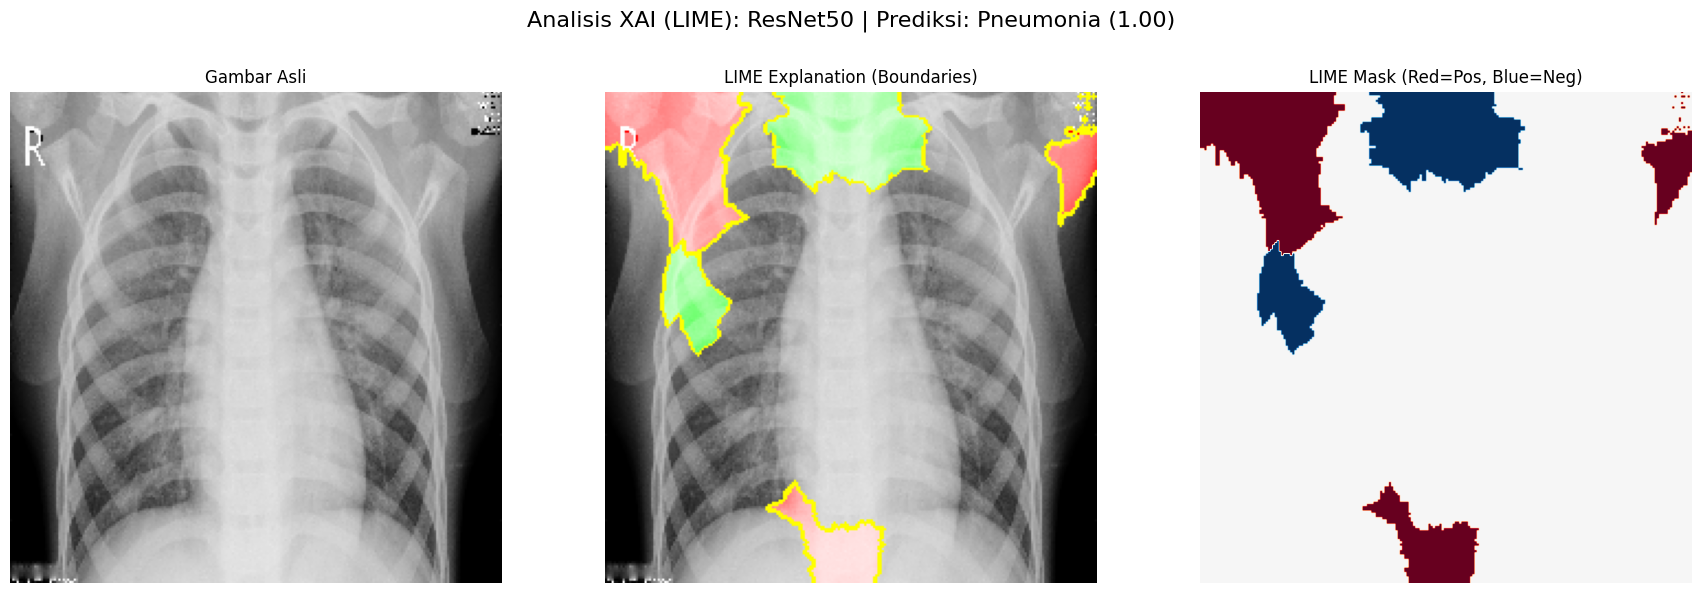

  - Memproses model: DenseNet121
  - Inisialisasi LIME Explainer untuk DenseNet121...
  - Menghasilkan penjelasan LIME untuk person1676_virus_2892.jpeg...


  0%|          | 0/100 [00:00<?, ?it/s]

  - Membuat visualisasi LIME untuk person1676_virus_2892.jpeg...


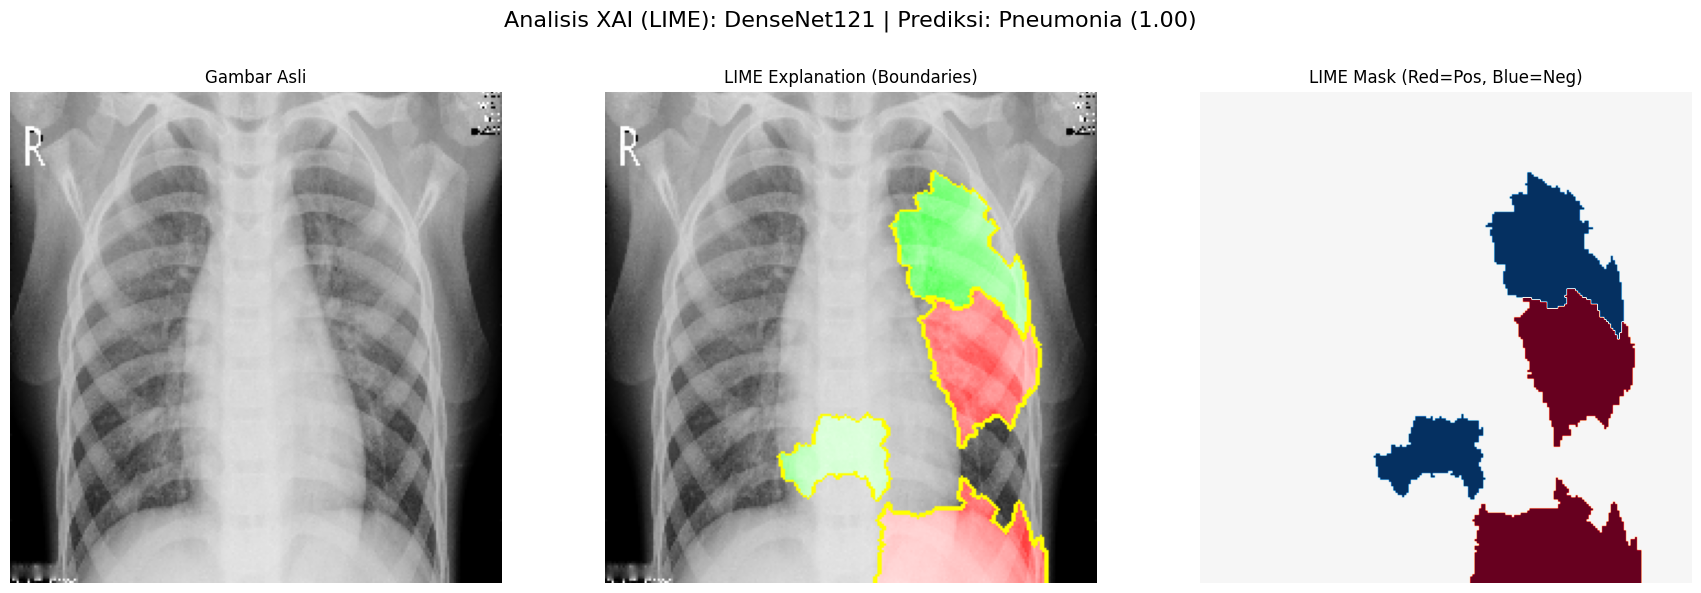

  - Memproses model: InceptionV3
  - Inisialisasi LIME Explainer untuk InceptionV3...
  - Menghasilkan penjelasan LIME untuk person1676_virus_2892.jpeg...


  0%|          | 0/100 [00:00<?, ?it/s]

  - Membuat visualisasi LIME untuk person1676_virus_2892.jpeg...


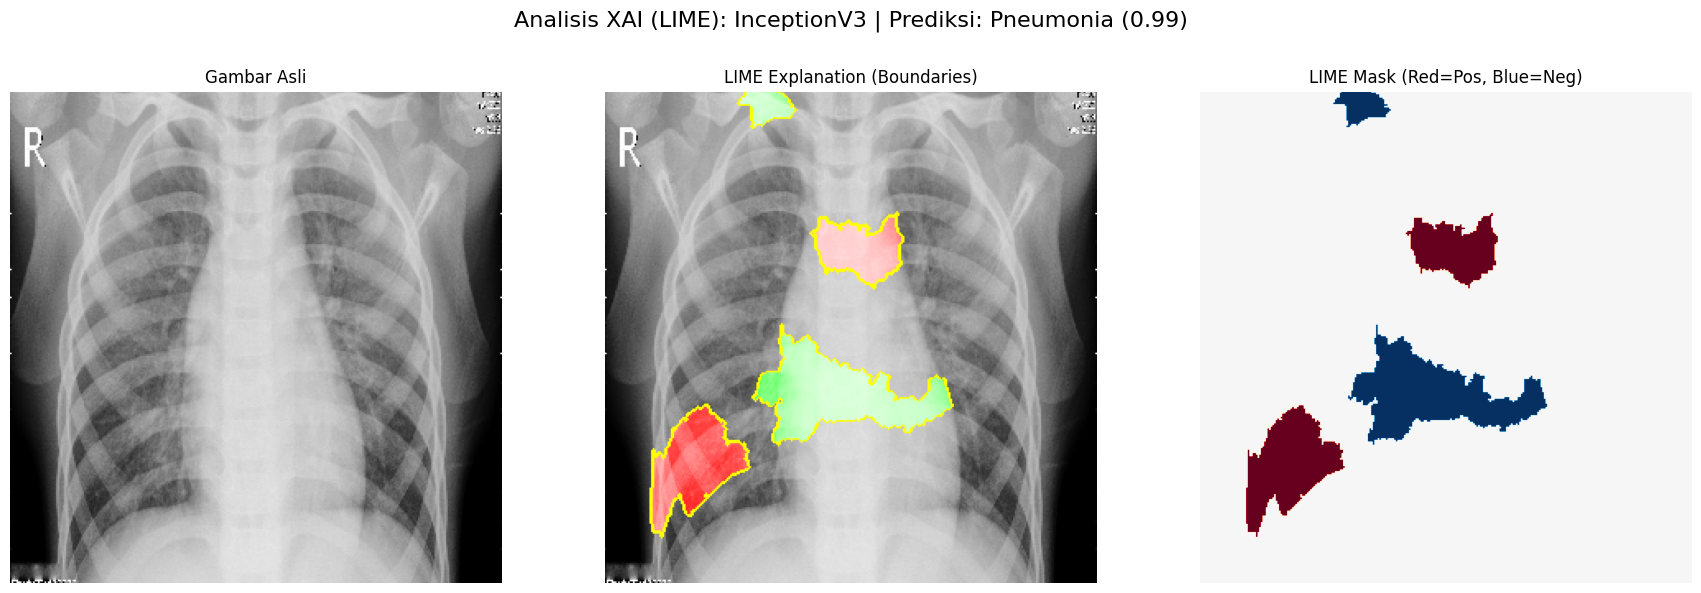


--- Menganalisis gambar: person1650_virus_2852.jpeg ---
  - Memproses model: ResNet50
  - Inisialisasi LIME Explainer untuk ResNet50...
  - Menghasilkan penjelasan LIME untuk person1650_virus_2852.jpeg...


  0%|          | 0/100 [00:00<?, ?it/s]

  - Membuat visualisasi LIME untuk person1650_virus_2852.jpeg...


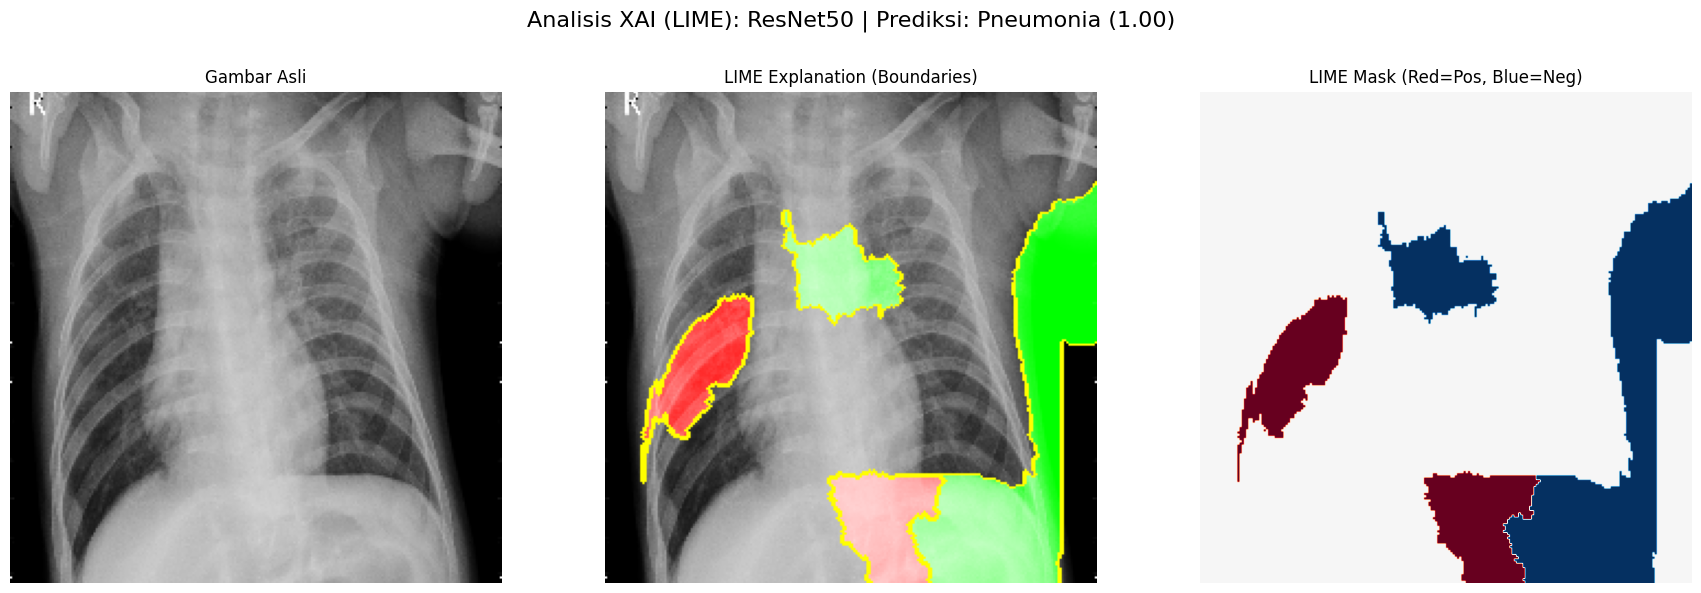

  - Memproses model: DenseNet121
  - Inisialisasi LIME Explainer untuk DenseNet121...
  - Menghasilkan penjelasan LIME untuk person1650_virus_2852.jpeg...


  0%|          | 0/100 [00:00<?, ?it/s]

  - Membuat visualisasi LIME untuk person1650_virus_2852.jpeg...


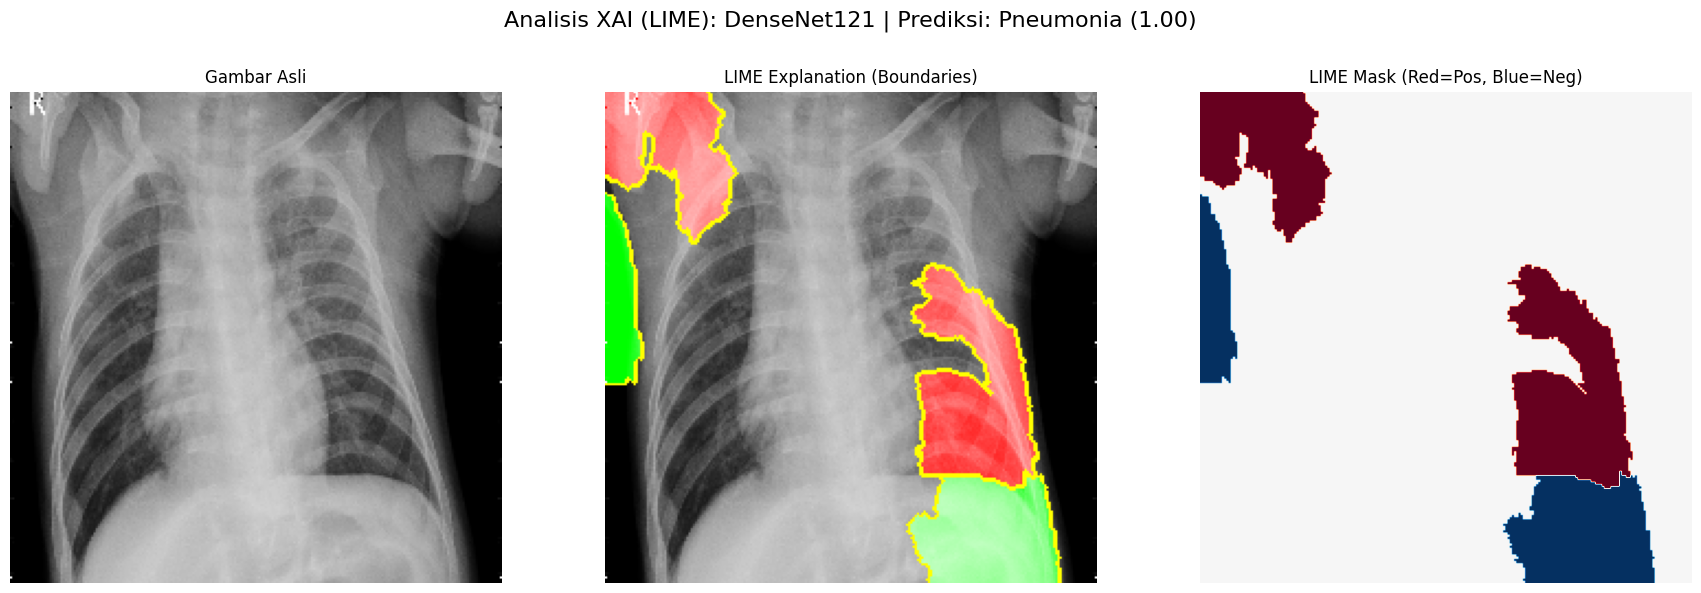

  - Memproses model: InceptionV3
  - Inisialisasi LIME Explainer untuk InceptionV3...
  - Menghasilkan penjelasan LIME untuk person1650_virus_2852.jpeg...


  0%|          | 0/100 [00:00<?, ?it/s]

  - Membuat visualisasi LIME untuk person1650_virus_2852.jpeg...


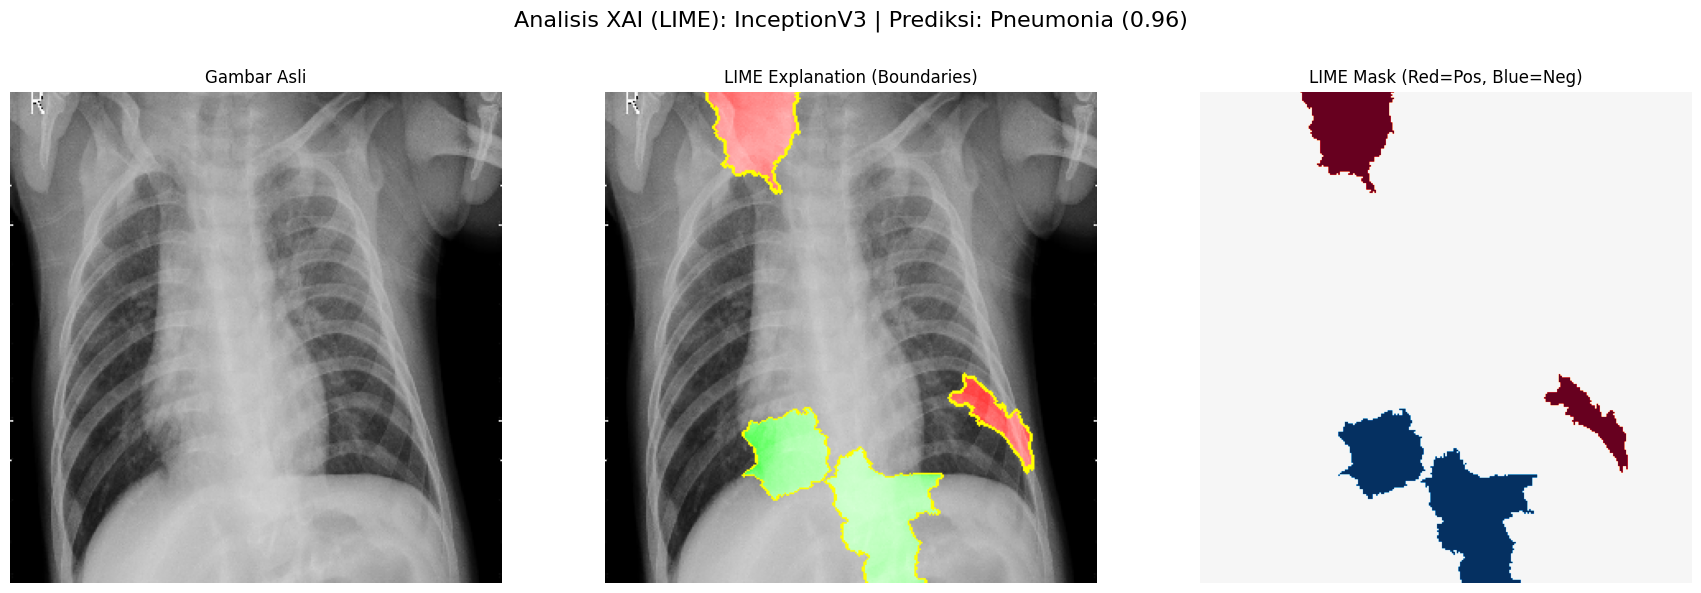


--- Menganalisis gambar: person22_virus_55.jpeg ---
  - Memproses model: ResNet50
  - Inisialisasi LIME Explainer untuk ResNet50...
  - Menghasilkan penjelasan LIME untuk person22_virus_55.jpeg...


  0%|          | 0/100 [00:00<?, ?it/s]

  - Membuat visualisasi LIME untuk person22_virus_55.jpeg...


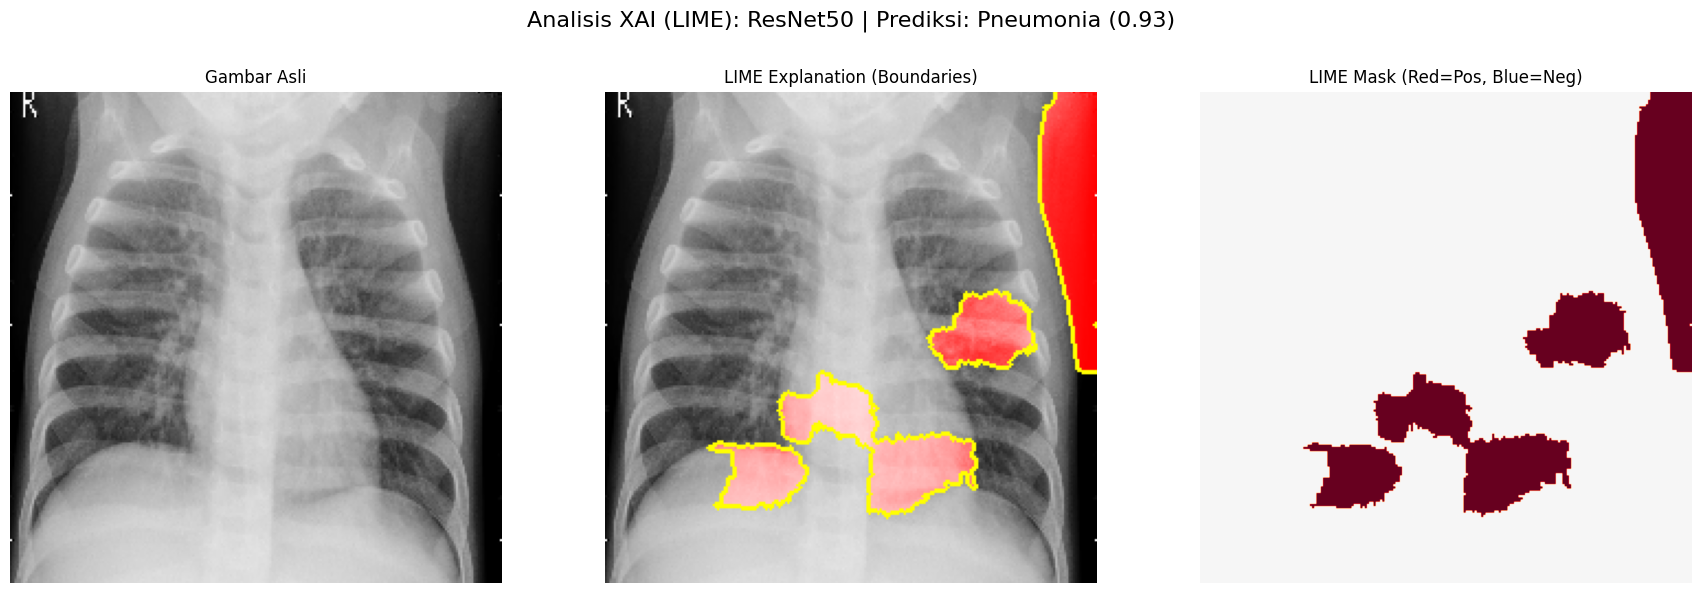

  - Memproses model: DenseNet121
  - Inisialisasi LIME Explainer untuk DenseNet121...
  - Menghasilkan penjelasan LIME untuk person22_virus_55.jpeg...


  0%|          | 0/100 [00:00<?, ?it/s]

  - Membuat visualisasi LIME untuk person22_virus_55.jpeg...


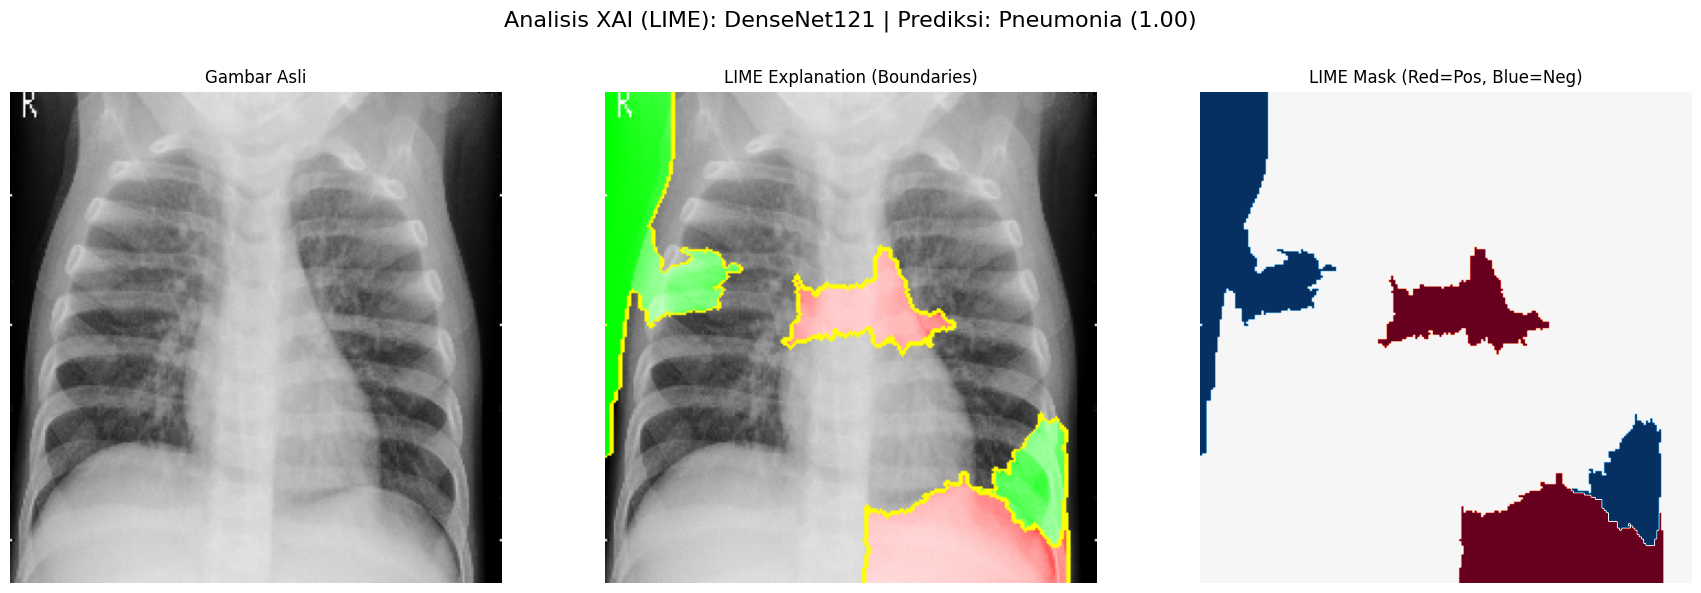

  - Memproses model: InceptionV3
  - Inisialisasi LIME Explainer untuk InceptionV3...
  - Menghasilkan penjelasan LIME untuk person22_virus_55.jpeg...


  0%|          | 0/100 [00:00<?, ?it/s]

  - Membuat visualisasi LIME untuk person22_virus_55.jpeg...


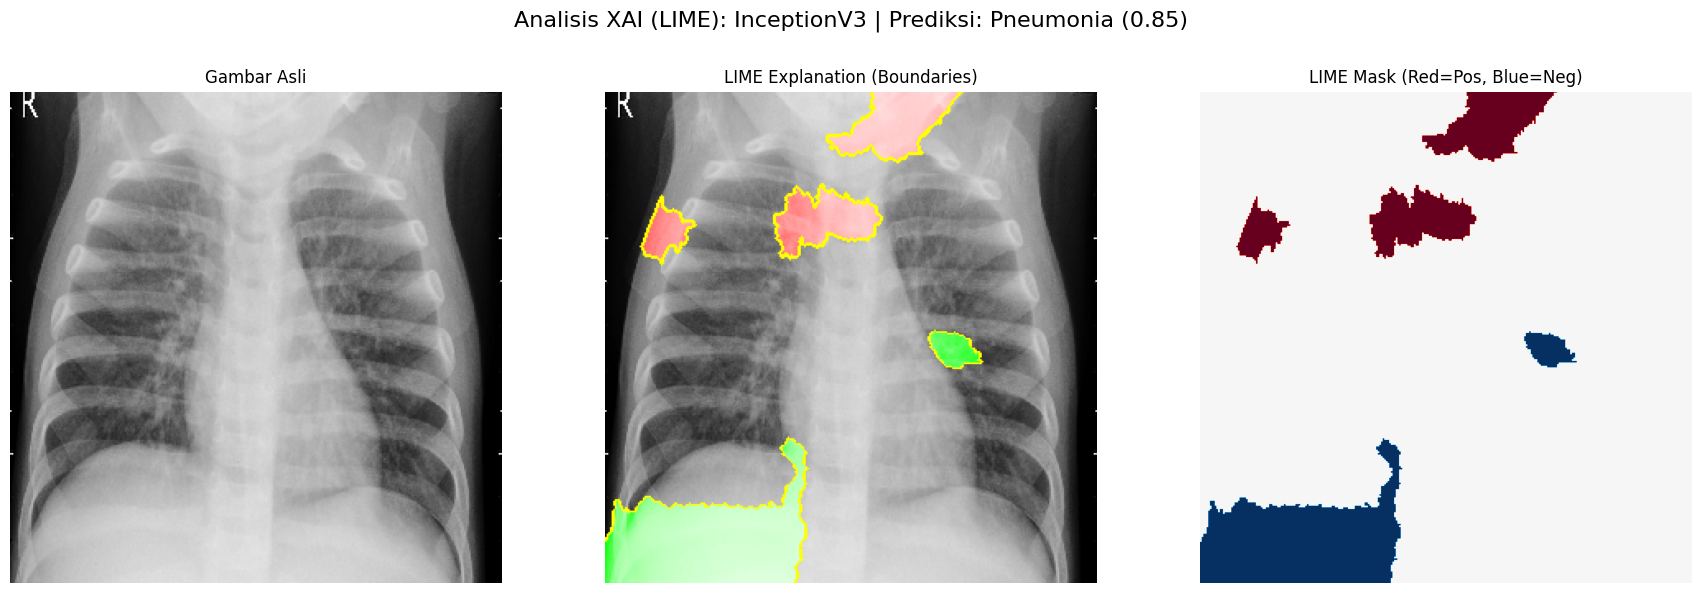


RINGKASAN ANALISIS LIME
         model                       image pred_label  pred_proba
0     ResNet50  person1676_virus_2892.jpeg  Pneumonia      0.9958
1  DenseNet121  person1676_virus_2892.jpeg  Pneumonia      1.0000
2  InceptionV3  person1676_virus_2892.jpeg  Pneumonia      0.9900
3     ResNet50  person1650_virus_2852.jpeg  Pneumonia      0.9983
4  DenseNet121  person1650_virus_2852.jpeg  Pneumonia      1.0000
5  InceptionV3  person1650_virus_2852.jpeg  Pneumonia      0.9649
6     ResNet50      person22_virus_55.jpeg  Pneumonia      0.9289
7  DenseNet121      person22_virus_55.jpeg  Pneumonia      1.0000
8  InceptionV3      person22_virus_55.jpeg  Pneumonia      0.8547

File visualisasi LIME telah disimpan.

Akhir dari Pipeline XAI (LIME).


In [12]:
# Pastikan library yang diperlukan diimpor
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import resnet50, densenet, inception_v3
from lime import lime_image
from skimage.segmentation import mark_boundaries
from glob import glob
import os

# Definisikan fungsi preprocessor secara eksplisit
def get_preprocessor(model_name):
    """Mengembalikan fungsi preprocessing yang benar berdasarkan nama model."""
    if model_name == 'ResNet50':
        return resnet50.preprocess_input
    elif model_name == 'DenseNet121':
        return densenet.preprocess_input
    elif model_name == 'InceptionV3':
        return inception_v3.preprocess_input
    else:
        raise ValueError(f"Preprocessor tidak dikenal untuk model: {model_name}")

# Definisikan konfigurasi (pastikan ini sesuai dengan konfigurasi asli Anda)
class Config:
    IMG_SIZE_224 = (224, 224)
    IMG_SIZE_299 = (299, 299)
    TEST_DIR = "/kaggle/input/pneumonia/Pneumonia/test" # Sesuaikan dengan path dataset Anda

config = Config()

# ----------------------------------------------------------------------------
# Fungsi untuk Analisis XAI menggunakan LIME
# ----------------------------------------------------------------------------
def calculate_xai_metrics_and_visualize_lime(model, img_path):
    """
    Fungsi inti yang menjalankan pipeline XAI (LIME) untuk satu gambar:
    1. Memproses gambar sesuai model.
    2. Menggunakan LIME untuk menjelaskan prediksi.
    3. Menghasilkan dan menyimpan plot visualisasi LIME.
    """
    # --- 1. Persiapan Gambar & Model ---
    model_name = model.name
    img_size = config.IMG_SIZE_299 if model_name == 'InceptionV3' else config.IMG_SIZE_224
    preprocessor = get_preprocessor(model_name)

    img = load_img(img_path, target_size=img_size)
    img_array = img_to_array(img)
    img_array_uint8 = np.uint8(img_array.copy()) # Simpan versi uint8 untuk visualisasi
    processed_array_for_pred = preprocessor(np.expand_dims(img_array.copy(), axis=0))

    # --- 2. Fungsi Wrapper Prediksi untuk LIME ---
    # LIME membutuhkan fungsi yang menerima batch array (num_samples, height, width, channels) dan mengembalikan probabilitas
    def predict_fn(images):
        # images adalah batch numpy array dengan ukuran yang benar (tidak perlu diproses ulang jika formatnya benar)
        processed_images = preprocessor(images)
        predictions = model.predict(processed_images, verbose=0)
        # Kembalikan array probabilitas untuk kelas (dalam kasus biner, ini shape (num_samples, 1))
        # LIME mengharapkan (num_samples, num_classes), jadi kita reshape jika perlu
        if predictions.shape[1] == 1: # Biner
            # Untuk biner, seringkali kita ingin mengembalikan probabilitas [kelas_negatif, kelas_positif]
            prob_pos = predictions[:, 0] # Ambil probabilitas kelas positif (1)
            prob_neg = 1 - prob_pos
            return np.column_stack((prob_neg, prob_pos)) # (num_samples, 2)
        return predictions # Untuk multi-class


    # --- 3. Inisialisasi Penjelas LIME ---
    print(f"  - Inisialisasi LIME Explainer untuk {model_name}...")
    explainer = lime_image.LimeImageExplainer()

    # --- 4. Hasilkan Penjelasan LIME ---
    print(f"  - Menghasilkan penjelasan LIME untuk {os.path.basename(img_path)}...")
    # Segmentasi gambar menjadi superpixels
    # num_samples: Jumlah gambar terganggu yang dihasilkan untuk pelatihan lokal (meningkatkan akurasi, tapi lebih lambat)
    # LIME akan mengacak keberadaan superpixels untuk membuat dataset lokal
    explanation = explainer.explain_instance(
        img_array_uint8, # Gunakan gambar uint8 untuk LIME
        predict_fn,
        top_labels=2, # Jelaskan kelas 0 dan 1 (Normal dan Pneumonia)
        hide_color=0, # Warna untuk menyembunyikan superpixels (0,0,0 = hitam)
        num_samples=100 # Jumlah sample lokal (bisa disesuaikan, 100 relatif cepat)
    )

    # --- 5. Ambil Penjelasan untuk Kelas Tertentu ---
    # Ambil prediksi tertinggi
    temp, mask = explanation.get_image_and_mask(
        explanation.top_labels[0], # Gunakan label tertinggi
        positive_only=False, # Tampilkan fitur positif dan negatif
        num_features=5, # Jumlah superpixels utama untuk dijelaskan
        hide_rest=False # Jangan sembunyikan sisanya
    )

    # --- 6. Visualisasi ---
    print(f"  - Membuat visualisasi LIME untuk {os.path.basename(img_path)}...")
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    pred_proba_full = model.predict(processed_array_for_pred, verbose=0)[0]
    # Untuk model biner sigmoid, proba adalah [kelas_positif], jadi prediksi adalah kelas 1 jika > 0.5
    pred_label_idx = 1 if pred_proba_full[0] > 0.5 else 0
    pred_proba = pred_proba_full[0] if pred_label_idx == 1 else 1 - pred_proba_full[0]
    class_names = ['Normal', 'Pneumonia']
    pred_label_name = class_names[pred_label_idx]

    fig.suptitle(f'Analisis XAI (LIME): {model.name} | Prediksi: {pred_label_name} ({pred_proba:.2f})', fontsize=16)

    axes[0].imshow(img_array_uint8.astype('uint8')); axes[0].set_title('Gambar Asli'); axes[0].axis('off')

    # Visualisasi hasil LIME
    img_bound = mark_boundaries(temp / 255.0, mask) # Gunakan temp yang sudah diwarnai
    axes[1].imshow(img_bound); axes[1].set_title('LIME Explanation (Boundaries)'); axes[1].axis('off')

    # Visualisasi mask LIME saja
    axes[2].imshow(mask, cmap='RdBu', vmin=-1, vmax=1); axes[2].set_title('LIME Mask (Red=Pos, Blue=Neg)'); axes[2].axis('off')

    plt.tight_layout(rect=[0, 0, 1, 0.93])
    plt.savefig(f'lime_analysis_{model_name}_{os.path.basename(img_path)}.png', dpi=150)
    plt.show()

    # Kembalikan sesuatu jika perlu (misalnya, informasi ringkas)
    return {'model': model_name, 'image': os.path.basename(img_path), 'pred_label': pred_label_name, 'pred_proba': pred_proba}


# ----------------------------------------------------------------------------
# Menjalankan Analisis XAI (LIME) dan Menyimpan Hasil
# ----------------------------------------------------------------------------
print("\nTahap 9: Menjalankan pipeline analisis XAI (LIME) pada sampel data tes...")

# Pilih beberapa gambar sampel dari set tes untuk dianalisis
sample_images = glob(os.path.join(config.TEST_DIR, "PNEUMONIA/*.jpeg"))[:3] # Ambil 3 sampel
if not sample_images:
    print("⚠ Tidak ada gambar sampel ditemukan untuk analisis XAI.")
else:
    lime_results = []

    for img_path in sample_images:
        print(f"\n--- Menganalisis gambar: {os.path.basename(img_path)} ---")
        for model_name, model in trained_models.items():
            print(f"  - Memproses model: {model_name}")
            result = calculate_xai_metrics_and_visualize_lime(
                model,
                img_path
            )
            if result:
                lime_results.append(result)

    # Tampilkan hasil ringkas
    if lime_results:
        results_df = pd.DataFrame(lime_results)
        print("\n" + "="*80 + "\nRINGKASAN ANALISIS LIME\n" + "="*80)
        print(results_df[['model', 'image', 'pred_label', 'pred_proba']].round(4))
        print("\nFile visualisasi LIME telah disimpan.")
    else:
        print("\n⚠ Tidak ada hasil LIME yang dihasilkan.")


print("\n" + "="*80)
print("Akhir dari Pipeline XAI (LIME).")
print("="*80)